# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее специальное', 'Неоконченное высшее', 'Два и более высших образования', 'Высшее', 'Неполное среднее', 'Ученая степень', 'Среднее'}


MARITAL_STATUS
{'Не состоял в браке', 'Состою в браке', 'Вдовец/Вдова', 'Гражданский брак', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Образование', 'Логистика', 'Транспорт', 'Сборочные производства', 'Маркетинг', 'Химия/Парфюмерия/Фармацевтика', 'Металлургия/Промышленность/Машиностроение', 'Наука', 'Государственная служба', 'Развлечения/Искусство', 'Энергетика', 'Информационные технологии', 'Недвижимость', 'Ресторанный бизнес/Общественное питание', 'Банк/Финансы', 'Сельское хозяйство', 'Юридические услуги/нотариальные услуги', 'СМИ/Реклама/PR-агенства', 'Управляющая компания', 'Нефтегазовая промышленность', 'Страхование', 'Здравоохранение', 'Информационные услуги', 'Туризм', 'Коммунальное хоз-во/Дорожные службы', 'Подбор персонала', 'Торговля', 'Другие сферы', 'Салоны красоты и здоровья', 'ЧОП/Детективная д-ть', 'Строительство'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

1. Можно просто игнорировать строки или признаки, содержащие пропуски.
1. Можно заполнить пропуски каким-либо значением: средним, медианой, нулем.
1. Можно пропуски запролнить каким-либо значением, а рядов ввести дополнительный признак-индикатор, показывающий, где находятся заполненные пропуски
1. Можно попробовать заполнить пропуски с использованием (стохастической) линейной регрессии по остальным фичам, для обучения регрессии данные без пропусков
1. Можно ввести метрику близости семплов, и заполнить пропуски, основываясь на кластеризации семплов, например, с помощью (fuzzy) K-means

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Категориальные признаки есть. Их можно кодировать либо one hot encoding'ом, либо метками (LabelEncoder). Так как категориальных признаков много, и многие из них имеют большое количество уникальных значения, то я предпочту использовать LabelEncoder.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [15]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    keys = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for key in keys:
        df_output[key] = df_output[key].map(lambda x: x.replace(',', '.')).astype('float')
        
    # заполняем нулями пропуски в PREVIOUS_CARD_NUM_UTILIZED, так как скорее всего пропуск означает, что у человека не было карты этого банка
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)
    #df_output = df_output.drop(['PREVIOUS_CARD_NUM_UTILIZED'], axis=1)
    
    # удаляем семплы с пропусками
    #df_output = df_output.dropna(axis=0)
    df_output = df_output.fillna('nonfilled_value')
    
    # категориальные признаки заменяем на метки категорий
    for column in df_output.columns: # перебираем все столбцы
        if str(df_output[column].dtype) == 'object' and column != 'sample': # если тип столбца - object
            df_output[column] = df_output[column].astype('category')
            df_output[column+'_CAT'] = df_output[column].cat.codes
            df_output = df_output.drop([column], axis=1)
    
    return df_output

In [16]:
preproc_data(df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 52 columns):
TARGET                         30133 non-null int64
AGE                            30133 non-null int64
SOCSTATUS_WORK_FL              30133 non-null int64
SOCSTATUS_PENS_FL              30133 non-null int64
GENDER                         30133 non-null int64
CHILD_TOTAL                    30133 non-null int64
DEPENDANTS                     30133 non-null int64
PERSONAL_INCOME                30133 non-null float64
REG_FACT_FL                    30133 non-null int64
FACT_POST_FL                   30133 non-null int64
REG_POST_FL                    30133 non-null int64
REG_FACT_POST_FL               30133 non-null int64
REG_FACT_POST_TP_FL            30133 non-null int64
FL_PRESENCE_FL                 30133 non-null int64
OWN_AUTO                       30133 non-null int64
AUTO_RUS_FL                    30133 non-null int64
HS_PRESENCE_FL                 30133 non-null int64
COT_P

In [17]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [18]:
X = df_train_preproc.drop(['TARGET'], axis=1).values
y = df_train_preproc['TARGET'].values

X_test_ = df_test_preproc.drop(['TARGET'], axis=1).values
y_test_ = df_test_preproc['TARGET'].values

#### Задание 5. Обучение и оценка качества разных моделей

In [19]:
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

clrs = {'DecisionTreeClassifier':DecisionTreeClassifier, 'RandomForestClassifier':RandomForestClassifier, 'LogisticRegression':LogisticRegression}
y_pred = {}
y_pred_proba = {}

for clr_name in clrs.keys():
    clr_instance = clrs[clr_name](random_state = random_state)
    clr_instance.fit(X_train, y_train)
    y_pred[clr_name] = clr_instance.predict(X_test)
    y_pred_proba[clr_name] = clr_instance.predict_proba(X_test)

In [21]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {}

for clr_name in clrs.keys():
    
    metrics[clr_name] = [accuracy_score(y_test, y_pred[clr_name]),
                         precision_score(y_test, y_pred[clr_name]),
                         recall_score(y_test, y_pred[clr_name])]
    
    print('{} metrics: '.format(clr_name), metrics[clr_name])

DecisionTreeClassifier metrics:  [0.7845412743595358, 0.13705583756345177, 0.14594594594594595]
RandomForestClassifier metrics:  [0.8740967812568425, 0.20588235294117646, 0.012612612612612612]
LogisticRegression metrics:  [0.8776001751696957, 0.16666666666666666, 0.0018018018018018018]


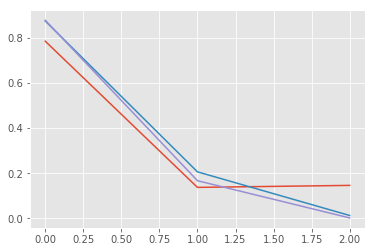

In [22]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

plt.plot(
    np.array(
        [metrics['DecisionTreeClassifier'], metrics['RandomForestClassifier'], metrics['LogisticRegression']]).T)

(-0.01, 1.01)

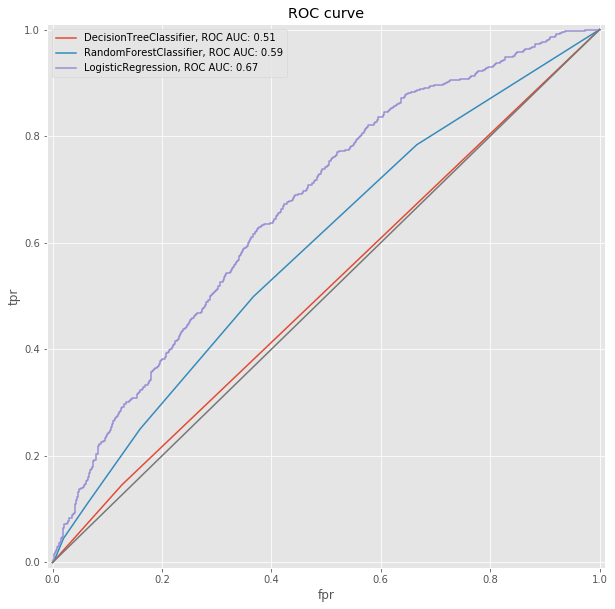

In [23]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой модели

from sklearn.metrics import roc_curve, roc_auc_score

roc_curve_data = {}

for clr_name in clrs.keys():
    
    roc_curve_data[clr_name] = roc_curve(y_test, y_pred_proba[clr_name][:,1])
    
#print(roc_curve_data)
plt.figure(figsize=(10, 10))

for clr_name in clrs.keys():
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[clr_name][:,1])
    auc = roc_auc_score(y_test, y_pred_proba[clr_name][:,1])
    
    plt.plot(fpr, tpr, label='{}, ROC AUC: {:.2f}'.format(clr_name, auc))
    
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.legend()
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv_method = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

rfc = RandomForestClassifier()

for clr_name in clrs.keys():
    clr_instance = clrs[clr_name](random_state = random_state)

    print(
        '{} mean ROC AUC: '.format(clr_name),
        cross_val_score(
            clr_instance,
            X,
            y,
            scoring='roc_auc',
            cv=cv_method,
            n_jobs=-1
        ).mean().round(5)
    )

DecisionTreeClassifier mean ROC AUC:  0.53197
RandomForestClassifier mean ROC AUC:  0.60095
LogisticRegression mean ROC AUC:  0.65026


In [31]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки
clr = LogisticRegression()
clr.fit(X, y)

y_pred_proba = clr.predict_proba(X_test_)

In [32]:
# Померить roc_auc на тесте
roc_auc_score(y_test_, y_pred_proba[:,1])

0.6567363873208858